In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *

In [ ]:
pip install pycaret[full]

In [ ]:
pip install interpret-community

# Data

In [ ]:
#dataset
#from google.colab import files
#f=files.upload()

In [2]:
#Encoding method 1
df = pd.read_excel(r'xrd_new.xlsx', sheet_name='Sheet6')

# Traning

### Keen key Features: FwHM and 2theta (remove_multicollinearity)

In [33]:
x=df.drop(['Isc','schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)

reg = setup(data=x , target = 'FF' ,normalize=True , normalize_method='minmax',train_size=0.8,fold=3
            ,keep_features=['FWHM 1', 'FWHM 2', 'FWHM 3', 'FWHM 4', 'FWHM 5',
            'FWHM 6', '2-theta 1', '2-theta 2', '2-theta 3', '2-theta 4',
            '2-theta 5', '2-theta 6','relative_intensity 1',
            'relative_intensity 2', 'relative_intensity 3', 'relative_intensity 4',
            'relative_intensity 5', 'relative_intensity 6']
            ,remove_multicollinearity = True, multicollinearity_threshold= 0.9
            , session_id=1543
            )

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 26)"
4,Transformed data shape,"(27, 26)"
5,Transformed train set shape,"(21, 26)"
6,Transformed test set shape,"(6, 26)"
7,Numeric features,25
8,Keep features,18
9,Preprocess,True


In [34]:
best = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4405,0.3105,0.5573,0.9556,0.0120,0.0099,0.0500
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0200
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.0700
ada,AdaBoost Regressor,0.9582,1.1494,1.0721,0.8357,0.0242,0.0224,0.0800
rf,Random Forest Regressor,0.8802,1.1775,1.0851,0.8317,0.0257,0.0212,0.2000
et,Extra Trees Regressor,1.2853,1.7930,1.3390,0.7437,0.0307,0.0302,0.1200
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0400
ridge,Ridge Regression,1.1977,2.3783,1.5422,0.6601,0.0359,0.0286,0.0300
huber,Huber Regressor,1.4011,2.7383,1.6548,0.6086,0.0374,0.0326,0.0300
par,Passive Aggressive Regressor,1.2048,2.8422,1.6859,0.5938,0.0397,0.0295,0.0200


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4405,0.3105,0.5573,0.9556,0.0120,0.0099
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


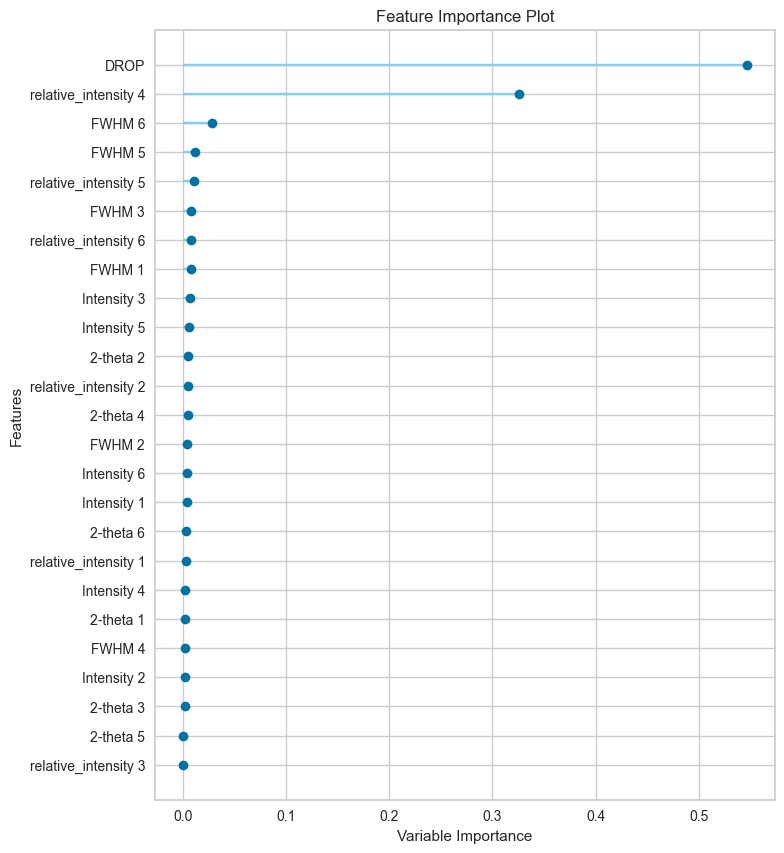

In [35]:
#gbr
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
plot_model(gbr, plot = 'feature_all')

In [16]:
interpret_model(gbr, plot='pfi')

25it [00:00, 142.34it/s]


In [36]:
gbr.feature_names_in_

array(['DROP', 'FWHM 1', 'FWHM 2', 'FWHM 3', 'FWHM 4', 'FWHM 5', 'FWHM 6',
       '2-theta 1', '2-theta 2', '2-theta 3', '2-theta 4', '2-theta 5',
       '2-theta 6', 'Intensity 1', 'Intensity 2', 'Intensity 3',
       'Intensity 4', 'Intensity 5', 'Intensity 6',
       'relative_intensity 1', 'relative_intensity 2',
       'relative_intensity 3', 'relative_intensity 4',
       'relative_intensity 5', 'relative_intensity 6'], dtype=object)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.8802,1.1775,1.0851,0.8317,0.0257,0.0212
Train,0.6853,0.7887,0.8881,0.8479,0.0203,0.0159


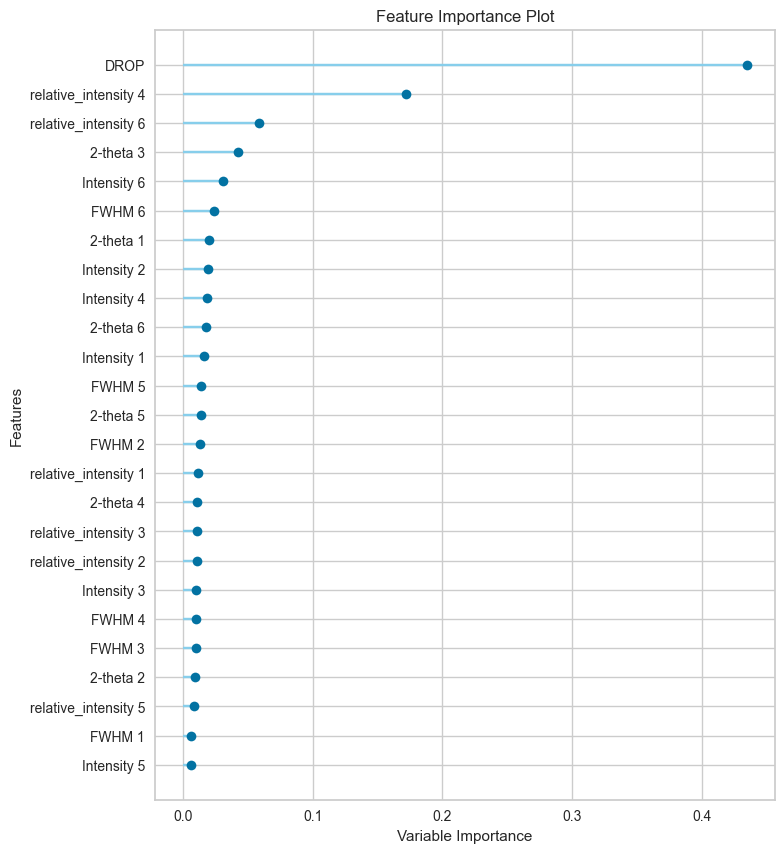

In [10]:
#rf
rf=create_model('rf',cross_validation = False, return_train_score=True)
plot_model(rf, plot = 'feature_all')

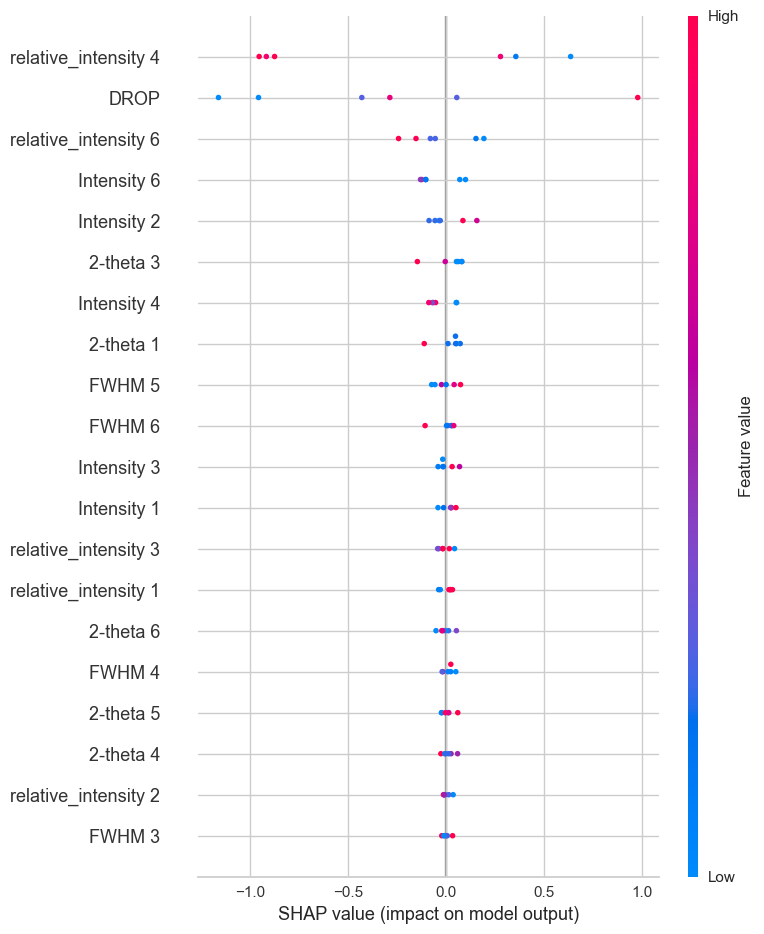

In [11]:
interpret_model(rf)

# 🟡 some features were removed automatically in this setup 


In [12]:


x=df.drop('Isc', axis=1)

reg = setup(data=x , target = 'FF' ,normalize=True , normalize_method='minmax',train_size=0.8,fold=3

             ,ignore_features=['schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6']

            ,remove_multicollinearity = True, multicollinearity_threshold= 0.9

            ,session_id=1543)

Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pycaret\internal\logging.py", line 144, in create_logger
    ch = logging.FileHandler(path)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py", line 1169, in __init__
    StreamHandler.__init__(self, self._open())
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py", line 1201, in _open
    return open_func(self.baseFilename, self.mode,
PermissionError: [Errno 13] Permission denied: 'C:\\Program Files\\Microsoft VS Code\\logs.log'


,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 32)"
4,Transformed data shape,"(27, 15)"
5,Transformed train set shape,"(21, 15)"
6,Transformed test set shape,"(6, 15)"
7,Ignore features,6
8,Numeric features,25
9,Preprocess,True


In [13]:
best = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4170,0.2950,0.5431,0.9578,0.0116,0.0094,0.1200
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.1200
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.2000
rf,Random Forest Regressor,0.8604,1.1369,1.0663,0.8375,0.0253,0.0207,0.3800
ada,AdaBoost Regressor,1.0534,1.1980,1.0945,0.8288,0.0244,0.0243,0.3100
et,Extra Trees Regressor,1.3089,1.7824,1.3351,0.7453,0.0306,0.0307,0.4000
lar,Least Angle Regression,1.2531,2.2217,1.4905,0.6825,0.0340,0.0293,0.0700
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.1100
ridge,Ridge Regression,1.1996,2.4122,1.5531,0.6553,0.0361,0.0286,0.0500
par,Passive Aggressive Regressor,1.3335,2.4576,1.5677,0.6488,0.0368,0.0320,0.0900


GBR

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4193,0.2960,0.5440,0.9577,0.0117,0.0094
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


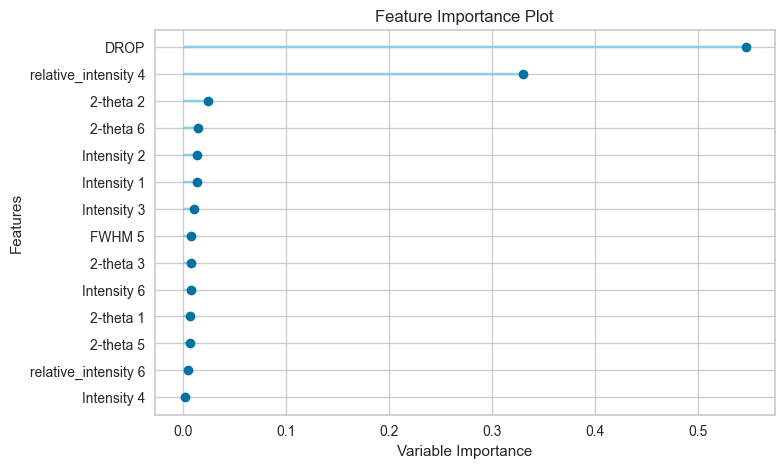

In [32]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
#evaluate_model(gbr)
plot_model(gbr, plot = 'feature_all')

In [31]:
#all rows(sample)
interpret_model(gbr, plot='pfi')

14it [00:00, 149.06it/s]


Permutation Feature Importance => pfi

In [6]:
interpret_model(gbr, plot='msa')

In [30]:
interpret_model(gbr, data=x, plot='pfi')

14it [00:00, 196.96it/s]


In [37]:
#sample1
specific_rows1 = x.iloc[[0,1,2,3,4,5], :]

# Get pfi for the specific rows
interpret_model(gbr, data=specific_rows1, plot='pfi')

25it [00:00, 141.83it/s]


In [38]:
interpret_model(gbr, data=specific_rows1, plot='msa')

In [39]:
#sample2
specific_rows2 = x.iloc[[6,7,8], :]

interpret_model(gbr, data=specific_rows2, plot='pfi')

0it [00:00, ?it/s]

25it [00:00, 103.14it/s]


In [11]:
interpret_model(gbr, data=specific_rows2, plot='msa')

In [40]:
#sample3
specific_rows3 = x.iloc[[9,10,11,12,13,14], :]

interpret_model(gbr, data=specific_rows3, plot='pfi')

25it [00:00, 176.85it/s]


In [13]:
interpret_model(gbr, data=specific_rows3, plot='msa')

In [41]:
#sample4
specific_rows4 = x.iloc[[15,16,17,18,19,20], :]

interpret_model(gbr, data=specific_rows4, plot='pfi')

25it [00:00, 169.12it/s]


In [15]:
interpret_model(gbr, data=specific_rows4, plot='msa')

In [42]:
#sample5
specific_rows5 = x.iloc[[21,22,23,24,25,26], :]

interpret_model(gbr, data=specific_rows5, plot='pfi')

25it [00:00, 156.32it/s]


In [17]:
interpret_model(gbr, data=specific_rows5, plot='msa')

Rf

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.8802,1.1775,1.0851,0.8317,0.0257,0.0212
Train,0.6853,0.7887,0.8881,0.8479,0.0203,0.0159


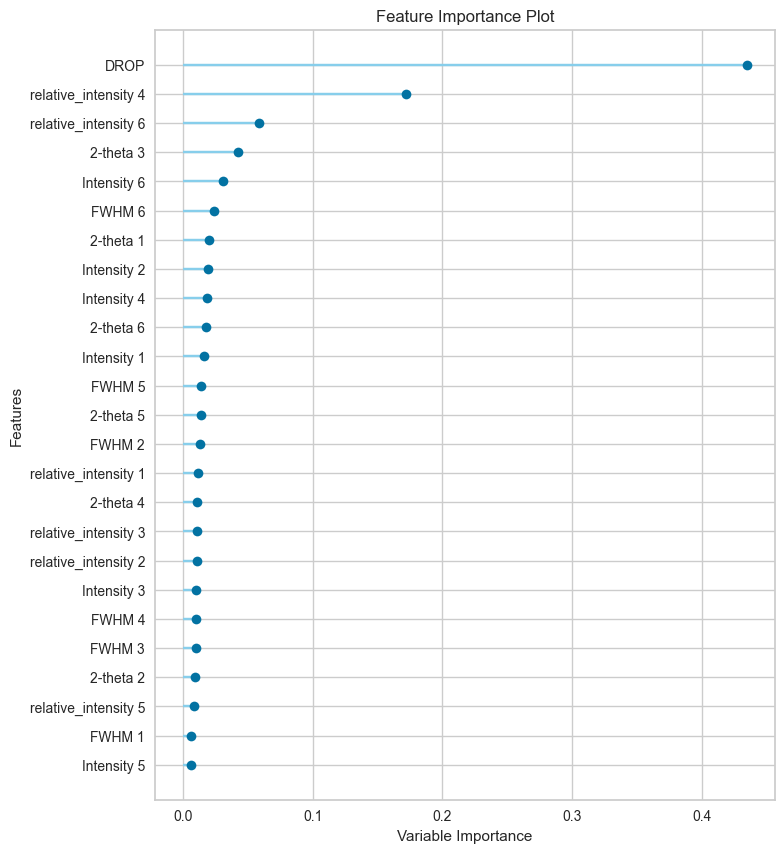

In [18]:
rf=create_model('rf',cross_validation = False, return_train_score=True)
plot_model(rf, plot = 'feature_all')

In [20]:
#all rows(samples)
interpret_model(rf, plot='summary')

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [21]:
#interpret_model(rf, plot='correlation')
interpret_model(rf, plot='pfi')

25it [00:00, 49.09it/s]


In [22]:
#sample1
specific_rows1= x.iloc[[0, 1, 2,3,4,5], :]

# Get pfi for the specific rows
interpret_model(rf, data=specific_rows1, plot='pfi')

25it [00:00, 51.32it/s]


In [23]:
#sample2
specific_rows2 = x.iloc[[6,7,8], :]

interpret_model(rf, data=specific_rows2, plot='pfi')

25it [00:00, 50.30it/s]


In [24]:
#sample3
specific_rows3 = x.iloc[[9,10,11,12,13,14], :]

interpret_model(rf, data=specific_rows3, plot='pfi')

25it [00:00, 39.37it/s]


In [25]:
#sample4
specific_rows4 = x.iloc[[15,16,17,18,19,20], :]

interpret_model(rf, data=specific_rows4, plot='pfi')

25it [00:00, 47.14it/s]


In [26]:
#sample5
specific_rows5 = x.iloc[[21,22,23,24,25,26], :]

interpret_model(rf, data=specific_rows5, plot='pfi')

25it [00:00, 51.04it/s]


# ordinal Encoding

In [27]:
x=df.drop('Isc', axis=1)

reg= setup(data=x , target = 'FF' ,normalize=True , normalize_method='minmax',train_size=0.8,fold=3
           ,ordinal_features= { 'DROP' : [1,2,3,4,5,6] }

             ,ignore_features=['schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6']

            ,remove_multicollinearity = True, multicollinearity_threshold= 0.9

            ,session_id=1543)

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 32)"
4,Transformed data shape,"(27, 15)"
5,Transformed train set shape,"(21, 15)"
6,Transformed test set shape,"(6, 15)"
7,Ignore features,6
8,Ordinal features,1
9,Numeric features,25


In [28]:
best = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4193,0.2960,0.5440,0.9577,0.0117,0.0094,0.0700
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0400
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.0800
rf,Random Forest Regressor,0.8990,1.2365,1.1120,0.8233,0.0263,0.0217,0.2500
ada,AdaBoost Regressor,1.1757,1.4449,1.2020,0.7935,0.0270,0.0273,0.1100
et,Extra Trees Regressor,1.3089,1.7824,1.3351,0.7453,0.0306,0.0307,0.1400
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0500
lar,Least Angle Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0500
ridge,Ridge Regression,1.1996,2.4122,1.5531,0.6553,0.0361,0.0286,0.0400
par,Passive Aggressive Regressor,1.3335,2.4576,1.5677,0.6488,0.0368,0.0320,0.0400


In [29]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4193,0.2960,0.5440,0.9577,0.0117,0.0094
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…